# CS-6570 Lecture 7 - Basic Data Visualization with Matplotlib

**Dylan Zwick**

*Weber State University*

In our last lecture we introduced Matplotlib and the basics of the figure and axes objects that are at the heart of Matplotlib plots.

Today, we're going to dive more into the types of data visualizations we can make with Matplotlib, and how to create them. Again, this will not be anywhere close to an exhaustive exploration of the library. It's an introduction that should give you the tools to do quite a bit, and a foundation to learn how to do even more.

With that being said, let's import our favorite libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, let's take a look at *Line Plots* - one of the most basic types of plots. Line plots display numerical values on one axis, and either numeric or categorical values on the other. They're commonly used to track changes over time. We already used line plots in our last lecture - they're quite intuitive and simple.

To play around a bit with line plots, let's import the [Country, Regional, and World GDP](https://www.kaggle.com/datasets/tunguz/country-regional-and-world-gdp) dataset from Kaggle.

In [2]:
df = pd.read_csv('Datasets/gdp_csv.csv')
print(df)

      Country Name Country Code  Year         Value
0       Arab World          ARB  1968  2.576068e+10
1       Arab World          ARB  1969  2.843420e+10
2       Arab World          ARB  1970  3.138550e+10
3       Arab World          ARB  1971  3.642691e+10
4       Arab World          ARB  1972  4.331606e+10
...            ...          ...   ...           ...
11502     Zimbabwe          ZWE  2012  1.424249e+10
11503     Zimbabwe          ZWE  2013  1.545177e+10
11504     Zimbabwe          ZWE  2014  1.589105e+10
11505     Zimbabwe          ZWE  2015  1.630467e+10
11506     Zimbabwe          ZWE  2016  1.661996e+10

[11507 rows x 4 columns]


Note that "Country Name" is a bit misleading here, as the categories might refer to regions that aren't countries. For example, there's no country called "Arab World". Nor, for that matter, is there a country called "European Union", although that entity is more well-defined.

So, let's compare a few regions (not countries): The EU, North America, South Asia, and East Asia & Pacific.

In [3]:
df_eu = df.loc[df['Country Name'] == 'European Union']
df_na = df.loc[df['Country Name'] == 'North America']
df_sa = df.loc[df['Country Name'] == 'South Asia']
df_ea = df.loc[df['Country Name'] == 'East Asia & Pacific']

Let's take a look at one of these to make sure it aligns with our expectations.

In [4]:
df_eu.head()

,Country Name,Country Code,Year,Value
531,European Union,EUU,1960,3.589415e+11
532,European Union,EUU,1961,3.907915e+11
533,European Union,EUU,1962,4.269104e+11
534,European Union,EUU,1963,4.702995e+11
535,European Union,EUU,1964,5.212003e+11


### Basic Line Plots and Scales ###

Looks good. Now let's plot these over time with a line plot:

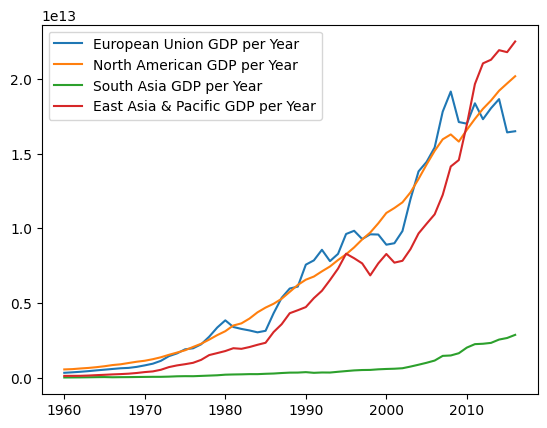

In [5]:
fig, ax = plt.subplots()
ax.plot(df_eu['Year'], df_eu['Value'], label = 'European Union GDP per Year')
ax.plot(df_na['Year'], df_na['Value'], label = 'North American GDP per Year')
ax.plot(df_sa['Year'], df_sa['Value'], label = 'South Asia GDP per Year')
ax.plot(df_ea['Year'], df_ea['Value'], label = 'East Asia & Pacific GDP per Year')

ax.legend()
plt.show()

When dealing with distributions that leans towards being exponential, it's common to plot a line plot on a logarithmic scale. Let's look into how to do this.

First, as an example let's use numpy to create an exponential function and plot it linearly:

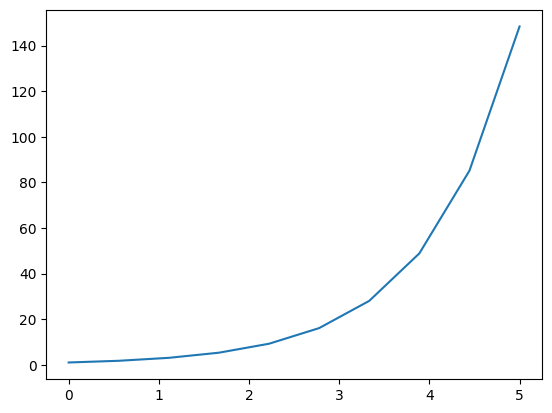

In [6]:
x = np.linspace(0,5,10)
y = np.exp(x)

plt.plot(x,y)
plt.show()

On the other hand, if we change our scale to logarithmic, we get:

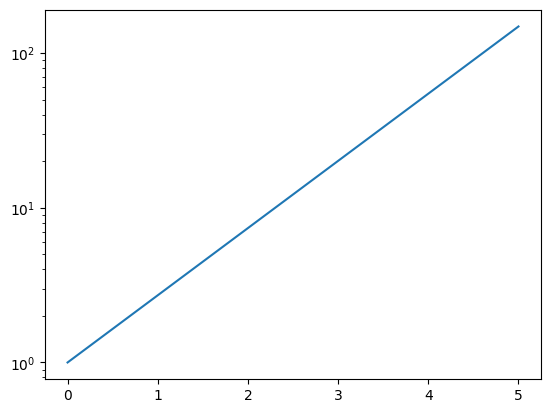

In [7]:
plt.yscale('log')
plt.plot(x,y)
plt.show()

So, an exponential function displays as a line on a logarithmic scale.

Let's check out our GDP growth plots on a logarithmic scale:

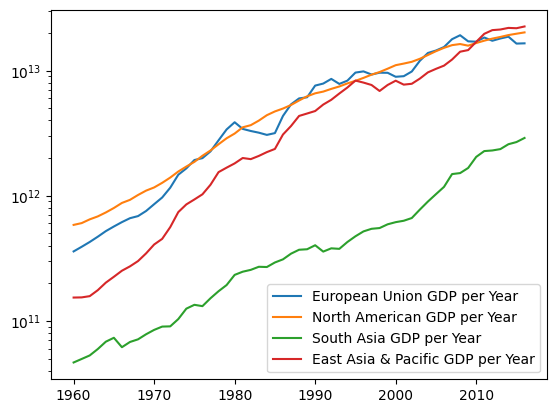

In [8]:
fig,ax = plt.subplots()

ax.plot(df_eu['Year'], df_eu['Value'], label = 'European Union GDP per Year')
ax.plot(df_na['Year'], df_na['Value'], label = 'North American GDP per Year')
ax.plot(df_sa['Year'], df_sa['Value'], label = 'South Asia GDP per Year')
ax.plot(df_ea['Year'], df_ea['Value'], label = 'East Asia & Pacific GDP per Year')

plt.yscale('log')
ax.legend()
plt.show()

This plot does a better job of showing the relative growth rate of South Asia, indicating that - if trends continue - it's not as far behind as you might think.

There are four basic types of linestyles - dotted, solid, dashed, and dashdot. You can either provide the name for "linestyle", or use the special characters :, -, --, and -. respectively. The color argument can be any valid Matplotlib color and the linewidth is a floating-point number denoting the width of each line:

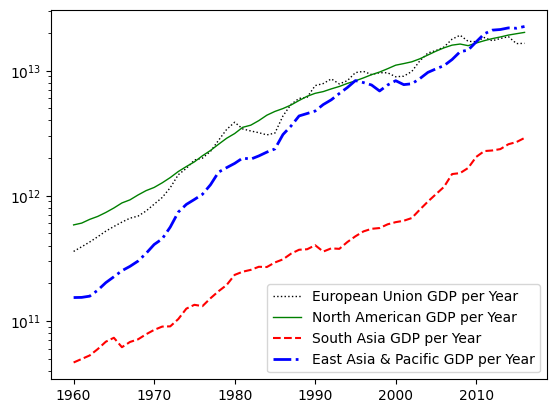

In [9]:
fig,ax = plt.subplots()

ax.plot(df_eu['Year'], df_eu['Value'], label = 'European Union GDP per Year', linestyle='dotted', color='k', linewidth=1)
ax.plot(df_na['Year'], df_na['Value'], label = 'North American GDP per Year', linestyle='-', color='g', linewidth=1)
ax.plot(df_sa['Year'], df_sa['Value'], label = 'South Asia GDP per Year', linestyle='--', color='r', linewidth=1.5)
ax.plot(df_ea['Year'], df_ea['Value'], label = 'East Asia & Pacific GDP per Year', linestyle='dashdot', color='b', linewidth=2)

plt.yscale('log')
ax.legend()
plt.show()

Sometimes, you might want to plot two sets of data with the same x-values, but with significantly different y-values. If this is the case, it can be hard to make sense of one of the plots. One thing that can help in these cases is to use two different scales.

For example:

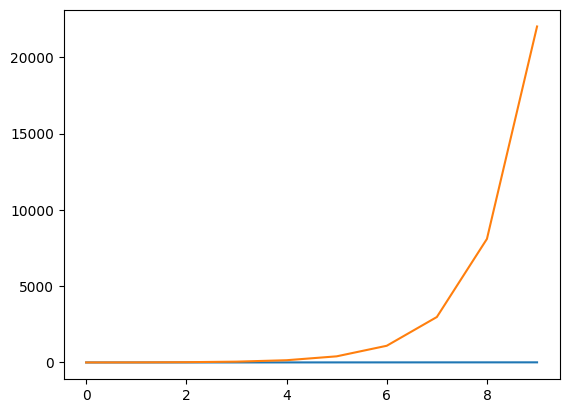

In [10]:
linear_sequence = np.linspace(1,10,10)
exponential_sequence = np.exp(linear_sequence)

fig, ax = plt.subplots()

ax.plot(linear_sequence)
ax.plot(exponential_sequence)
plt.show()

Now, that line isn't flat - but it sure looks that way. If we want to use two different scales (y-axes), we can do this by creating two overlapping axes objects - which is done with the [*twinx()*](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html) command. 

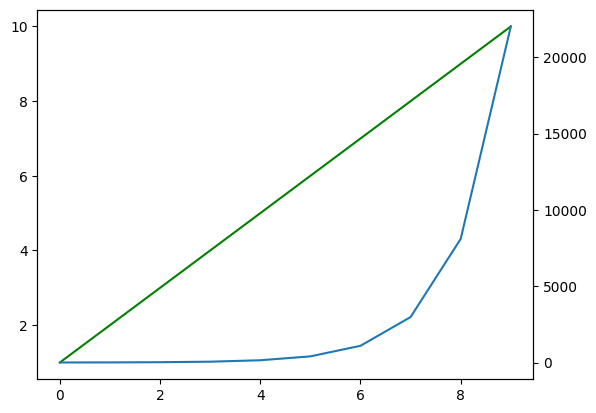

In [11]:
fig, ax = plt.subplots()

ax.plot(linear_sequence, color='green')

ax2 = ax.twinx() ##Create a new, overlapping axis object.

ax2.plot(exponential_sequence)

plt.show()

Note I switched the color of the first plot so that it wouldn't be the same as the second, but otherwise I went with the default parameters.

If instead we wanted, for example, to have the first plot be on a linear scale while the second is on a logarithmic scale, we could do that:

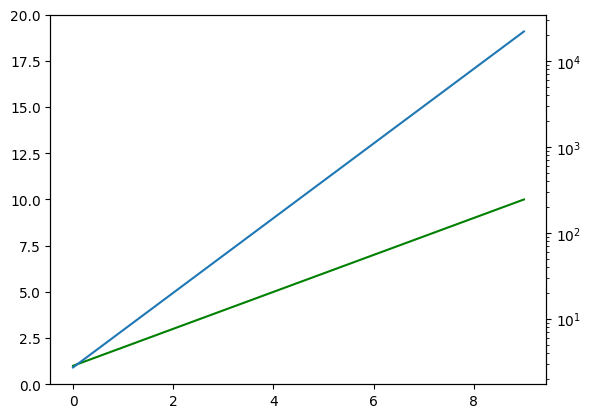

In [12]:
fig, ax = plt.subplots()

ax.plot(linear_sequence, color='green')

ax2 = ax.twinx() ##Create a new, overlapping axis object.

ax2.plot(exponential_sequence)

ax.set_ylim(0,20)
ax2.set_yscale('log')

plt.show()

### Bar Plots ###

A bar plot is another extremely common type of plot in data visualization. To create one, we simply use the *bar* command when we plot:

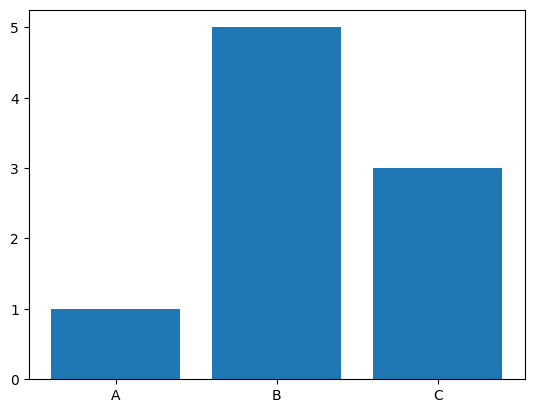

In [13]:
x = ['A','B','C']
y = [1,5,3]

plt.bar(x,y)
plt.show()

Let's take a look at something a little more interesting than our own manual lists. To do this, we'll check out the [World Happiness Report 2021](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021) dataset from Kaggle. It has various "scores" for different factors that might impact human happiness, and we can easily plot their relationships as well as standalone features. The data is aggregated from the Gallop World Poll, which among other things tracks other issues such as food access, employment, and human well-being.

Let's import the dataset and take a look at a bit of its contents:

In [14]:
df = pd.read_csv('Datasets/world-happiness-report-2021.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/world-happiness-report-2021.csv'

Let's take a look at "Freedom to make life choices" by the Regional indicator:

In [ ]:
fig, ax = plt.subplots()
ax.bar(df['Regional indicator'], df['Freedom to make life choices'], label = 'Freedom score')
ax.legend()

plt.show()

Well that's ugly. How can we clean up those category labels? One way is we can rotate them:

In [ ]:
fig, ax = plt.subplots()
ax.bar(df['Regional indicator'], df['Freedom to make life choices'], label = 'Freedom score')
ax.legend()

plt.xticks(rotation = 90)
plt.show()

Better!

Well, it looks like most regions are pretty free. In fact, those numbers seem suspiciously high.

Let's look into this data a bit more. One way we can do this is with the *describe* function:

In [ ]:
df['Freedom to make life choices'].describe()

So, the mean value is .79, but none of our bars is below .8? What gives?

Well, let's take another look at our dataset:df.head()

In [ ]:
df.head()

There are multiple rows for each regional indicator. So, what our chart is doing is its plotting each country for a given region on top of the others! If there are, say, 7 countries is "Western Europe", then there are seven overlaid bar charts. What this means is we're really just plotting the **maximum** for each region. Probably not what we want. But, what do we want?

One thing that could make sense is to plot the mean or the median for each individual region. We can do this by grouping the dataset by regional indicators, and the calculating the mean for each group:

In [ ]:
df_means = df[['Regional indicator','Freedom to make life choices']].groupby('Regional indicator').mean()
df_means

This is the data we wanted to plot originally. Plotting this we get:

In [ ]:
fig, ax = plt.subplots()
ax.bar(df_means.index, df_means['Freedom to make life choices'], label = 'Freedom score')
ax.legend()

plt.xticks(rotation = 90)
plt.show()

Suppose we also wanted to provide a line with the mean value over all countries. Well, we could do that with the *axhline* function.

In [ ]:
mean = df['Freedom to make life choices'].mean()

fig, ax = plt.subplots()
ax.bar(df_means.index, df_means['Freedom to make life choices'], label = 'Freedom score')
ax.axhline(mean, label='Overall Mean Freedom Score')
ax.legend()

plt.xticks(rotation = 90)
plt.show()

This is looking better. Not great, but better.

Now, each of these bars is an aggregate. However, a lot of information can be hidden in an aggregate. For example, there might be one country that is much more free than all the others, and it drags the region up. Or, it might be that all countries in the region have a similar score. How could we get an indication of how spread out the data is?

Well, one one we could do this is with the standard deviation, which is a measure of the average sum of square error. (We'll be hearing this term again.) We can add this to our bar plot using the 'yerr' parameter:

In [ ]:
df_stds = df[['Regional indicator','Freedom to make life choices']].groupby('Regional indicator').std()

fig, ax = plt.subplots()
ax.bar(df_means.index, df_means['Freedom to make life choices'], label = 'Freedom score', yerr=df_stds['Freedom to make life choices'])
ax.axhline(mean, label='Overall Mean Freedom Score')
ax.legend()

plt.xticks(rotation = 90)
plt.show()

The differences here are stark - "Southeast Asia" doesn't have much deviation, while "South Asia" has a significant deviation.

This plot is providing us with a decent amount of information! However, it's only got one color. If we wanted to change the color of our overall mean line and our bars to make it look better, we can do so:

In [ ]:
fig, ax = plt.subplots()
colors = ['blue','red']
ax.bar(df_means.index, df_means['Freedom to make life choices'], label = 'Freedom score', yerr=df_stds['Freedom to make life choices'], color=colors)
ax.axhline(mean, label='Overall Mean Freedom Score', color='green')
ax.legend()

plt.xticks(rotation = 90)
plt.show()

While we only gave it an array of two colors, it cycles through these for the bars. If we'd given it more colors, it would use more. Whether this looks better is partly an aesthetic call, and I'm terrible with colors, so please feel free to improve on it.

Finally, note that Matplotlib doesn't let us sort the order of the bars through its functions. It gets the data we give it, and it plots it in the order it's received. So, if we want to sort the data differently, we need to do the sorting before we sent it to Matplotlib.

With Pandas, that's easy. Suppose we wanted to sort by the average freedom score per region. We could do so as follows:

In [ ]:
df_means.sort_values('Freedom to make life choices', inplace=True)

fig, ax = plt.subplots()
colors = ['blue','red']
ax.bar(df_means.index, df_means['Freedom to make life choices'], label = 'Freedom score', yerr=df_stds['Freedom to make life choices'], color=colors)
ax.axhline(mean, label='Overall Mean Freedom Score', color='green')
ax.legend()

plt.xticks(rotation = 90)
plt.show()

That looks great! Except, there's a problem. Notice that while the order of the means has changed, the order of the standard deviations that we're using for the error bars has not. That's not good. We'd like to sort them both. How can we do this?

Well, one way is to merge the two dataframes together, and **then** sort them. To do this, we want to merge both the left and right dataframes on their index columns, which means we need to set both right_index and left_index to "True":

In [ ]:
df_merged = pd.merge(df_means, df_stds, right_index=True, left_index=True)
df_merged.columns = ['Freedom mean', 'Freedom std']
df_merged

Now, if we sort by "Freedom mean" we'll get:

In [ ]:
df_merged.sort_values('Freedom mean', inplace=True)
df_merged

Using this to create our bar chart, we get:

In [ ]:
fig, ax = plt.subplots()
colors = ['blue','red']
ax.bar(df_merged.index, df_merged['Freedom mean'], label = 'Freedom score', yerr=df_merged['Freedom std'], color=colors)
ax.axhline(mean, label='Overall Mean Freedom Score', color='green')
ax.legend()

plt.xticks(rotation = 90)
plt.show()

That's better!

### Scatter Plots ###

A scatter plot in a visualization between two numerical features that can be helpful in visualizing relationships and correlations. The **marks** on a scatter plot can also contain additional information if desired - for example in a bubble plot.

Scatter plots are quite versatile and can be used with a wide range of datasets - so we'll use a few. We'll start with the [Ames Housing](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset) dataset and visualize some correlations between features from it. The dataset contains 80 features that focus on the physical properties of houses in Ames, Iowa.

In [ ]:
df = pd.read_csv('../Datasets/AmesHousing.csv')
df.head()

This dataset has lots of numeric features, and it makes sense if some features correlate with others. For example, the "Lot Area" almost certainly has a positive correlation with the "SalePrice". On the other hand, it's not totally clear whether the "Roof Style", for example, would correlate with "SalePrice".

Let's check out a scatter plot for two variables - "Gr Liv Area", which refers to the living area above ground, and "SalePrice":

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df['Gr Liv Area'], df['SalePrice'])

plt.xlabel('Living Area Above Ground')
plt.ylabel('Sale Price')

plt.show()

Note that if we wanted to specify the $x$ and $y$ coordinates for our scatter plot, we could do so explicitly, which can help clear up potential ambiguity.

Looking at our scatter plot, we see there's a clear positive correlation between these two variables. Which makes sense.

What if we'd like to know how, say, the area above ground correlates with the sale price, and the overall quality correlates with the sale price? Well, one way to do that would be with a 3D contour plot, but that would probably not be the right thing to use here, unless we were particularly interested in how area above ground and overall quality intersect.

What we can do instead is just draw a couple plots on different axes:

In [ ]:
fig, ax = plt.subplots(2, figsize=(10,6))

ax[0].scatter(x = df['Gr Liv Area'], y = df['SalePrice'])
ax[0].set_xlabel("Living Area Above Ground")
ax[0].set_ylabel("House Price")

ax[1].scatter(x = df['Overall Qual'], y = df['SalePrice'])
ax[1].set_xlabel("Overall Quality")
ax[1].set_ylabel("House Price")

plt.show()

All those dots in the "Overall Quality" plat make it look like a bunch of solid lines. In this situation, it might be better to use horizontal lines instead of dots:

In [ ]:
fig, ax = plt.subplots(2, figsize=(10,6))

ax[0].scatter(x = df['Gr Liv Area'], y = df['SalePrice'])
ax[0].set_xlabel("Living Area Above Ground")
ax[0].set_ylabel("House Price")

ax[1].scatter(x = df['Overall Qual'], y = df['SalePrice'], marker = '_') #Use a different, shorter marker.
ax[1].set_xlabel("Overall Quality")
ax[1].set_ylabel("House Price")

plt.show()

Right now, each marker only conveys information through its position. What a waste! We can use other attributes of each marker - like size, shape, and color - to convey additional information. For example, suppose we wanted to indicate the "Sale Condition" of a house in our second scatter plot above. We could do that through colors:

In [ ]:
#Using HTML specified colors.
colors = {'Normal' : '#db5f57', 
          'Abnorml' : '#d3db57', 
          'Family' : '#57db5f', 
          'Partial' : '#57d3db', 
          'Alloca' : '#5f57db', 
          'AdjLand' : '#db57d3'}

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x = df['Overall Qual'], y = df['SalePrice'], marker = '_', 
           color=df['Sale Condition'].apply(lambda x: colors[x])) #Apply the specified colors.
ax.set_xlabel("Overall Quality")
ax.set_ylabel("House Price")

plt.show()

There does seem to be some correlation in the color here - there are more blue-coded houses in the higher-quality section of the market. Naturally, these sell for a higher price in general. The blue color maps to a *Partial* sale condition. This might imply that house-owners fix up houses with high-quality materials, and then sell parts of the house as smaller standalone units, similar to apartments. Maybe.

Another way we can use marks to convey data is through their *size*. Manipulating the size of a scatter plot marker can create a type of plot knows as a *bubble plot*.

If you want to scale the size of your markers by another variable, you'll want to do so with a numerical variables since you'll be passing those variables as the size argument. You also (probably) want to make sure there's not huge variance in your values - otherwise the big ones will totally dominate the plot.

Let's explore a bubble plot using the World Happiness Dataset, which is similar to the 2021 report we looked at earlier, but includes a "Happiness Score".

In [ ]:
df = pd.read_csv('../Datasets/worldHappiness2019.csv')
df.head()

Let's look at how the GDP per capita plots against the generosity scores:

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df['GDP per capita'], y = df['Generosity'])
plt.xlabel('GDP per Capita')
plt.ylabel('Generosity Score')

plt.show()

Surprisingly not much correlation here at all. If anything, richer countries might be *less* generous.

Let's now modify the size of each market based on a third variable - the perceived *Happiness* of the inhabitants of that country.

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x = df['GDP per capita'], y = df['Generosity'], s = df['Score'])
plt.xlabel('GDP per capita')
plt.ylabel('Generosity Score')

plt.show()

Those marks are too small. Let's scale them by 25:

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x = df['GDP per capita'], y = df['Generosity'], s = df['Score']*25)
plt.xlabel('GDP per capita')
plt.ylabel('Generosity Score')

plt.show()

Well, that didn't help much.

Let's change this up by creating a new list, based on the values of the Happiness Score feature, but introduce an exponent. We'll multiply the score first, and then raise it to a power of 2. This introduces us to a non-linear growth pattern. Really small values will get smaller, while higher values will get bigger.

In [ ]:
size = df['Score'].to_numpy() #Converts the dataframe column to a numpy array
s = [3*s**2 for s in size]

While this may seem excessive, keep in mind that the size of each market is its area. This means that to double the height/width of a market, you have to multiply s by 4. This mechanic is actually exactl ythe reason we can use this approach to scaling sizes in bubble plots.

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x = df['GDP per capita'], y = df['Generosity'], s = s)
plt.xlabel('GDP per capita')
plt.ylabel('Generosity Score')

plt.show()

With this we can see a bit more signal in this data. It appears that, while richer countries aren't necessarily more generous, they do tend to be happier. Not sure I like what that says about humanity.

We've only scratched the surface of data visualization here. There are literally entire graduate courses on the subject, but this should give at least an intro to some of the visualizations we'll be using throughout this course.